

## Gradient Boosting Model


In [4]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
user_df = pd.read_csv("train_users_2.csv")
user_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


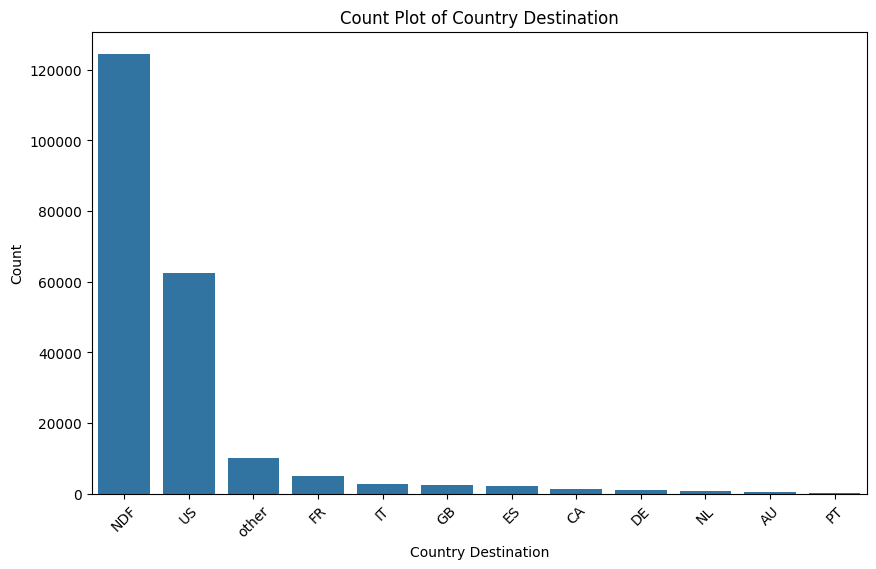

In [7]:
# Plot the count plot for the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data = user_df, x='country_destination', order = user_df['country_destination'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count Plot of Country Destination')
plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.show()

## Data Cleaning


In [8]:
user_df.shape

(213451, 16)

In [9]:
user_df.isna().sum()

,0
id,0
date_account_created,0
timestamp_first_active,0
date_first_booking,124543
gender,0
age,87990
signup_method,0
signup_flow,0
language,0
affiliate_channel,0


In [10]:
# Calculate the median excluding NaN values
median_age = user_df['age'].median()

# Replace NaN and outlier ages with the median
user_df['age'] = np.where((user_df['age'].isnull()) | (user_df['age'] > 100) | (user_df['age'] < 10), median_age, user_df['age'])

In [11]:
user_df.dropna(subset=['date_first_booking'], inplace=True)
user_df['first_affiliate_tracked'].fillna(method = 'ffill', inplace=True)
user_df.isna().sum()

,0
id,0
date_account_created,0
timestamp_first_active,0
date_first_booking,0
gender,0
age,0
signup_method,0
signup_flow,0
language,0
affiliate_channel,0


In [12]:
user_df.shape

(88908, 16)

In [13]:
# Reset the index and drop the old index column
user_df = user_df.reset_index(drop=True)


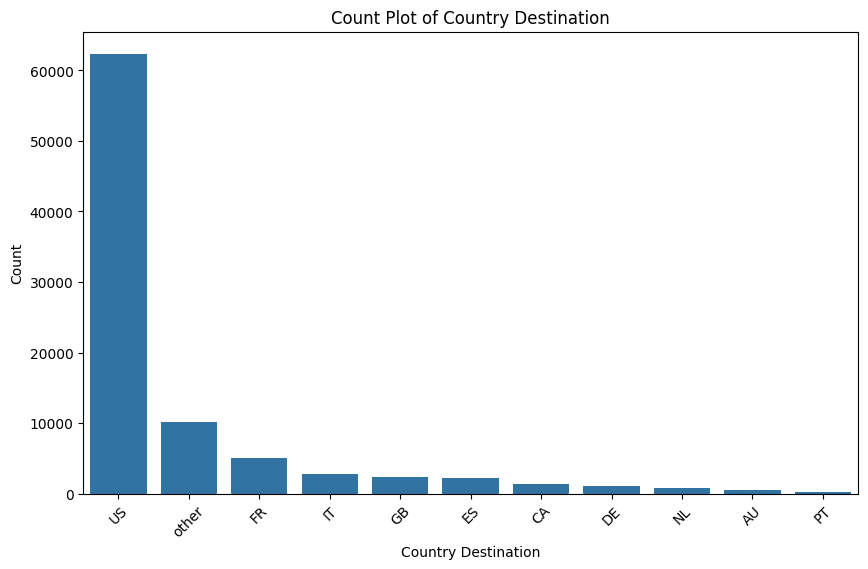

In [14]:
# Plot the count plot for the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=user_df, x='country_destination', order=user_df['country_destination'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Count Plot of Country Destination')
plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.show()

In [15]:
features = ['age','gender', 'signup_method', 'signup_flow', 'language',
                'affiliate_channel', 'affiliate_provider',
                'first_affiliate_tracked', 'signup_app',
                'first_device_type', 'first_browser']
categorical_cols = ['gender', 'signup_method', 'language',
                'affiliate_channel', 'affiliate_provider',
                'first_affiliate_tracked', 'signup_app',
                'first_device_type', 'first_browser', 'country_destination']

# Create Fetures categorical columns
# Initialize a dictionary to store label encoders for each feature
label_encoders = {}
# Loop through each categorical feature to apply label encoding
for col in categorical_cols:
    le = LabelEncoder()  # Create a label encoder instance for each feature
    user_df[col] = le.fit_transform(user_df[col].astype(str))  # Encode feature
    label_encoders[col] = le  # Store encoder to use for future transformations (e.g., test data)






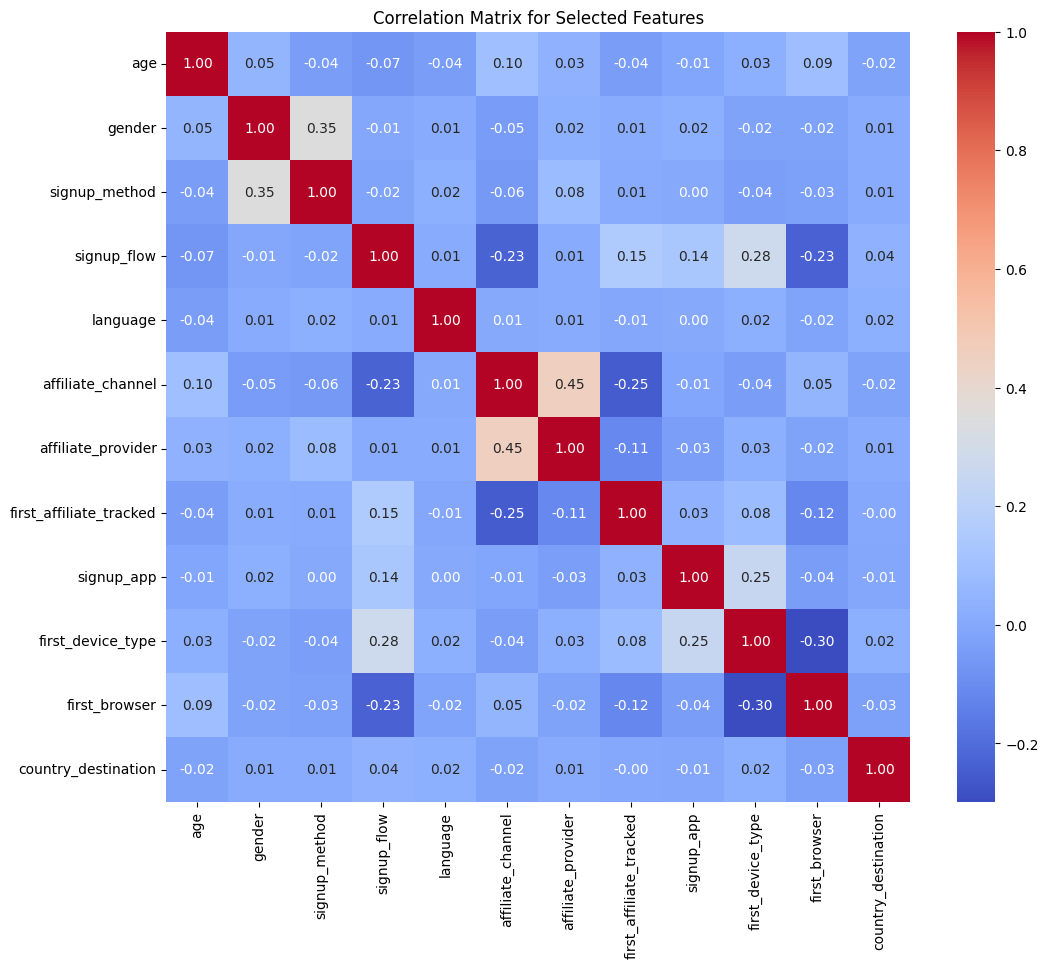

In [16]:

df_selected = user_df[features + ['country_destination']]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()


In [17]:
user_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,1,56.0,0,3,5,2,4,6,2,6,14,9
1,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,1,42.0,1,0,5,2,4,6,2,3,12,10
2,87mebub9p4,2010-09-14,20091208061105,2010-02-18,0,41.0,0,0,5,2,4,6,2,3,7,9
3,osr2jwljor,2010-01-01,20100101215619,2010-01-02,0,34.0,0,0,5,3,12,3,2,3,7,9
4,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,1,46.0,0,0,5,3,2,6,2,3,29,9


In [18]:
user_df['country_destination'].unique()

array([ 9, 10,  4,  1,  5,  3,  6,  8,  7,  2,  0])

In [19]:
# Define your features (X) and target variable (y)
from sklearn.model_selection import train_test_split
X = user_df[features]  # Your selected features
y = user_df['country_destination']  # The target variable


# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gbc = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [300, 400, 500],
    'learning_rate': [0.01, 0.02, 0.03],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Evaluation metric
    verbose=2,  # Display progress messages
    n_jobs=-1  # Use all available cores for parallel processing
)

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model with hyperparameters

gbc2 = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.02,
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=5,
    max_features="sqrt",
    subsample=0.5,
    random_state=42
)

gbc2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=5, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=3,
                           n_estimators=500, random_state=42, subsample=0.5)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, ndcg_score
from sklearn.preprocessing import label_binarize

# Predict on the test set
y_pred = gbc2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision (use 'weighted' to account for class imbalance)
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Binarize y_test for NDCG calculation (needed for multiclass NDCG)
y_test_binarized = label_binarize(y_test, classes=gbc2.classes_)

# Calculate NDCG score
y_pred_proba = gbc2.predict_proba(X_test)  # Probability predictions for NDCG
ndcg = ndcg_score(y_test_binarized, y_pred_proba, k=5)  # Adjust k as needed
print("NDCG Score:", ndcg)


Accuracy: 0.6996400854796986
Precision: 0.5314898856250203
NDCG Score: 0.8244172059330139


In [28]:
import pickle
# Assuming `gbc1` is your Gradient Boosting Classifier
with open('gradient_boosting_model.pkl', 'wb') as model_file:
    pickle.dump(gbc2, model_file)

In [29]:
# Save the encoders dictionary
with open('label_encoders.pkl', 'wb') as enc_file:
    pickle.dump(label_encoders, enc_file)


In [25]:
X_test.head()

,age,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
4779,63.0,1,0,0,5,2,4,0,2,6,14
23924,34.0,0,0,0,5,6,8,3,2,6,14
43621,32.0,1,0,0,5,2,4,6,2,6,12
87642,25.0,1,0,0,5,2,4,0,1,8,21
62031,65.0,0,0,0,5,5,8,0,2,3,29


In [26]:

# Reset the index and drop the old index column
y_test = y_test.reset_index(drop=True)


In [27]:
# Get indices where 'country_destination' is not equal to 9
indices_not_9 = y_test.loc[y_test != 9].index
indices_not_9

Index([    5,    11,    14,    19,    20,    22,    24,    26,    29,    34,
       ...
       17758, 17759, 17760, 17765, 17767, 17770, 17771, 17773, 17774, 17777],
      dtype='int64', length=5337)

In [23]:
import pandas as pd

# Select a sample from the test set
sample_index = 20  # Change this to select different samples
sample = X_test.iloc[[sample_index]]  # Use [[]] to keep it as DataFrame

# Get actual destination for the sample
actual_destination_encoded = y_test.iloc[sample_index]
actual_destination = label_encoders['country_destination'].inverse_transform([actual_destination_encoded])[0]

# Get top 5 predictions with probabilities
y_pred_proba = gbc2.predict_proba(sample)
top_5_indices = y_pred_proba[0].argsort()[-5:][::-1]  # Indices of top 5 probabilities
top_5_encoded_countries = gbc2.classes_[top_5_indices]  # Encoded country labels
top_5_countries = label_encoders['country_destination'].inverse_transform(top_5_encoded_countries)  # Decode to original labels
top_5_probs = y_pred_proba[0][top_5_indices]           # Top 5 probabilities

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Country': top_5_countries,
    'Probability': top_5_probs
})

print("Actual Destination:", actual_destination)
print("\nTop 5 Predicted Destinations with Probabilities:")
print(result_df)


Actual Destination: other

Top 5 Predicted Destinations with Probabilities:
  Country  Probability
0      US     0.665876
1   other     0.119881
2      FR     0.067549
3      IT     0.041912
4      GB     0.033682


In [38]:

# Example user ID
user_id = 'lsw9q7uk0j'  # Replace with actual user ID

# Retrieve the user's data from the test set
user_data = user_df[user_df['id'] == user_id]
if user_data.empty:
    print(f"No data found for user ID: {user_id}")
else:
    # Extract features for prediction
    user_features = user_data[features]  # 'features' should be your selected features list



    # Predict probabilities for the user
    y_pred_proba = gbc2.predict_proba(user_features)

    # Get the top 5 predicted country indices
    top_5_indices = np.argsort(y_pred_proba, axis=1)[:, -5:][:, ::-1]

    # Decode the top 5 indices to original country labels
    top_5_countries = label_encoders['country_destination'].inverse_transform(top_5_encoded_countries)  # Decode to original labels
    # Get actual destination for the sample
    actual_destination_encoded = user_data['country_destination'].iloc[0]
    actual_destination = label_encoders['country_destination'].inverse_transform([actual_destination_encoded])[0]

    # Print the user data and top 5 predicted countries
    print("User Data:")
    print(user_data)
    print("\nTop 5 Predicted Country Destinations:")
    print(top_5_countries)
    print("\nActual Destination:", actual_destination)


User Data:
           id date_account_created  timestamp_first_active date_first_booking  \
4  lsw9q7uk0j           2010-01-02          20100102012558         2010-01-05   

   gender   age  signup_method  signup_flow  language  affiliate_channel  \
4       1  46.0              0            0         5                  3   

   affiliate_provider  first_affiliate_tracked  signup_app  first_device_type  \
4                   2                        6           2                  3   

   first_browser  country_destination  
4             29                    9  

Top 5 Predicted Country Destinations:
['US' 'other' 'FR' 'IT' 'GB']

Actual Destination: US
